# Downloading dataframe

In [1]:
import yfinance as yf
import pandas as pd
from pandas import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
from mplfinance.original_flavor import candlestick_ohlc
import matplotlib.dates as mdates
import numpy as np
import warnings

warnings.filterwarnings('ignore')

# Define the ticker symbol for USD/INR on Yahoo Finance
ticker_symbol = 'USDINR=X'

start_date = '2004-01-01'
end_date = pd.Timestamp.today().strftime('%Y-%m-%d')

# Download data from Yahoo Finance
df = yf.download(ticker_symbol, start=start_date, end=end_date)

# Select the required columns
df = df[['Open', 'High', 'Low', 'Close', 'Adj Close']]

# Show the last few rows of the dataframe
print(df.describe())

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_15744\2290784955.py:3: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime
[*********************100%%**********************]  1 of 1 completed

              Open         High          Low        Close    Adj Close
count  5264.000000  5264.000000  5264.000000  5264.000000  5264.000000
mean     59.288875    59.491069    59.107981    59.290263    59.290263
std      13.380227    13.402375    13.341383    13.390831    13.390831
min      38.995998    39.235001    38.979000    39.044998    39.044998
25%      45.705251    45.833249    45.596500    45.708750    45.708750
50%      61.165499    61.431499    60.963999    61.185499    61.185499
75%      70.866323    71.091127    70.607374    70.872501    70.872501
max      85.194000    84.929298    83.577400    85.194000    85.194000


# Exploratory data analysis

In [2]:
df.shape

(5264, 5)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5264 entries, 2004-01-01 to 2024-04-18
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       5264 non-null   float64
 1   High       5264 non-null   float64
 2   Low        5264 non-null   float64
 3   Close      5264 non-null   float64
 4   Adj Close  5264 non-null   float64
dtypes: float64(5)
memory usage: 246.8 KB


In [4]:
df.head()

,Open,High,Low,Close,Adj Close
Date,,,,,
2004-01-01,45.528999,45.532001,45.519001,45.527000,45.527000
2004-01-02,45.527000,45.645000,45.497002,45.603001,45.603001
2004-01-05,45.528000,45.564999,45.459000,45.466000,45.466000
2004-01-06,45.467999,45.604000,45.457001,45.549000,45.549000
2004-01-07,45.548000,45.560001,45.375000,45.387001,45.387001


In [5]:
df.tail()

,Open,High,Low,Close,Adj Close
Date,,,,,
2024-04-12,83.349297,83.615898,83.254204,83.349297,83.349297
2024-04-15,83.611099,83.611504,83.417397,83.611099,83.611099
2024-04-16,83.505997,83.696800,83.211899,83.505997,83.505997
2024-04-17,83.667503,83.735001,83.577400,83.667503,83.667503
2024-04-18,83.595802,83.614197,83.484802,83.595802,83.595802


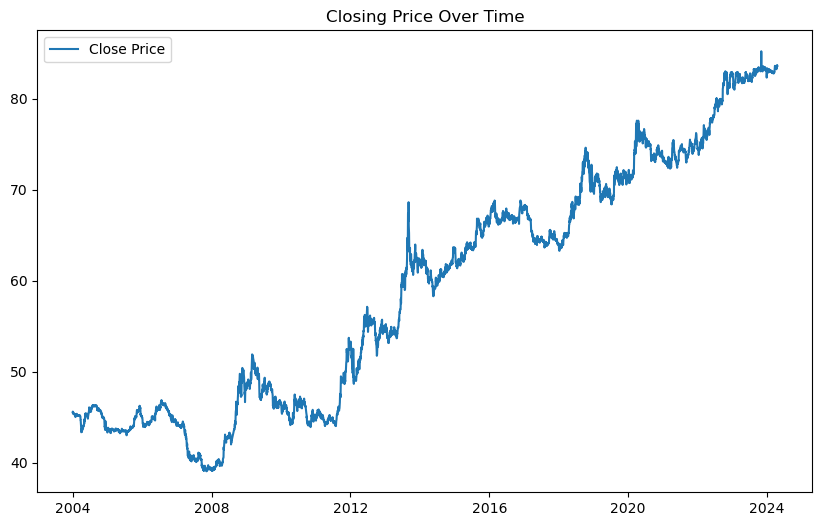

In [6]:
# Plotting the closing prices
plt.figure(figsize=(10, 6))
plt.plot(df['Close'], label='Close Price')
plt.title('Closing Price Over Time')
plt.legend()
plt.show()

In [7]:
ma50 = df.Close.rolling(50).mean()
ma50

Date
2004-01-01          NaN
2004-01-02          NaN
2004-01-05          NaN
2004-01-06          NaN
2004-01-07          NaN
                ...    
2024-04-12    83.071575
2024-04-15    83.083811
2024-04-16    83.091857
2024-04-17    83.103795
2024-04-18    83.115459
Name: Close, Length: 5264, dtype: float64

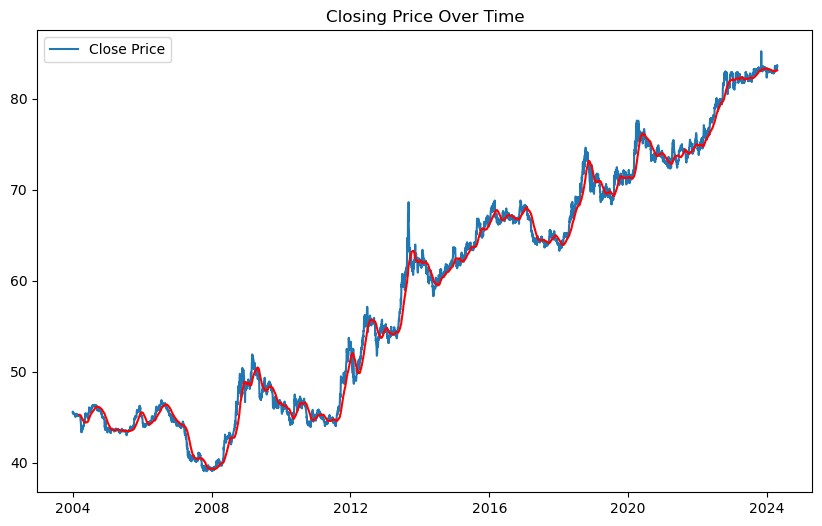

In [8]:
plt.figure(figsize=(10, 6))
plt.plot(df['Close'], label='Close Price')
plt.plot(ma50, 'r')
plt.title('Closing Price Over Time')
plt.legend()
plt.show()

In [9]:
ma100 = df.Close.rolling(100).mean()
ma100

Date
2004-01-01          NaN
2004-01-02          NaN
2004-01-05          NaN
2004-01-06          NaN
2004-01-07          NaN
                ...    
2024-04-12    83.123895
2024-04-15    83.126861
2024-04-16    83.128275
2024-04-17    83.130770
2024-04-18    83.133425
Name: Close, Length: 5264, dtype: float64

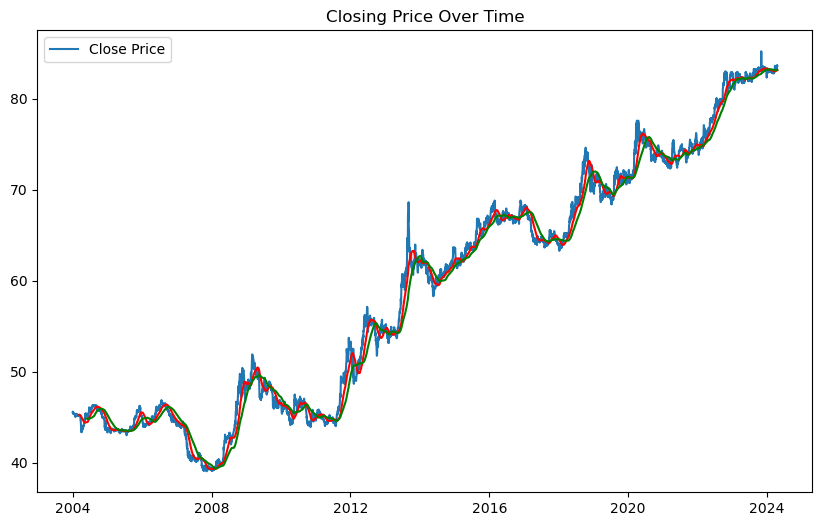

In [10]:
plt.figure(figsize=(10, 6))
plt.plot(df['Close'], label='Close Price')
plt.plot(ma50, 'r')
plt.plot(ma100, 'g')
plt.title('Closing Price Over Time')
plt.legend()
plt.show()

In [11]:
def day_avg(data, window=7):
    DA = (data['Close']).rolling(window=7).mean()
    return DA

In [12]:
def lag(data, shift=1):
    L = (data['Close']).shift(1)
    return L

In [13]:
def diff(data):
    difference = data['Open'] - data['Close']
    return difference


In [14]:
def RSI(data, window=7):
    delta = data.diff(1)
    gain = (delta.where(delta > 0, 0)).rolling(window=window).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=window).mean()
    RS = gain / loss
    return 100 - (100 / (1 + RS))

In [15]:
def CCI(data, window=7):
    TP = (data['High'] + data['Low'] + data['Close']) / 3
    CCI = (TP - TP.rolling(window=window).mean()) / (0.015 * TP.rolling(window=window).std())
    return CCI

In [16]:
def MACD(data, slow=26, fast=12):
    exp1 = data['Close'].ewm(span=fast, adjust=False).mean()
    exp2 = data['Close'].ewm(span=slow, adjust=False).mean()
    macd = exp1 - exp2
    signal = macd.ewm(span=9, adjust=False).mean()
    return macd, signal

In [17]:
def ROC(data, window=7):
    N = data['Close'].diff(window)
    D = data['Close'].shift(window)
    ROC = (N / D) * 100
    return ROC

In [18]:
def Stochastic_Oscillator(data, window=7):
    L14 = data['Low'].rolling(window=window).min()
    H14 = data['High'].rolling(window=window).max()
    K = 100 * ((data['Close'] - L14) / (H14 - L14))
    return K

In [19]:
def ATR(data, window=7):
    high_low = data['High'] - data['Low']
    high_close = np.abs(data['High'] - data['Close'].shift())
    low_close = np.abs(data['Low'] - data['Close'].shift())
    ranges = pd.concat([high_low, high_close, low_close], axis=1)
    true_range = np.max(ranges, axis=1)
    ATR = true_range.rolling(window=window).mean()
    return ATR

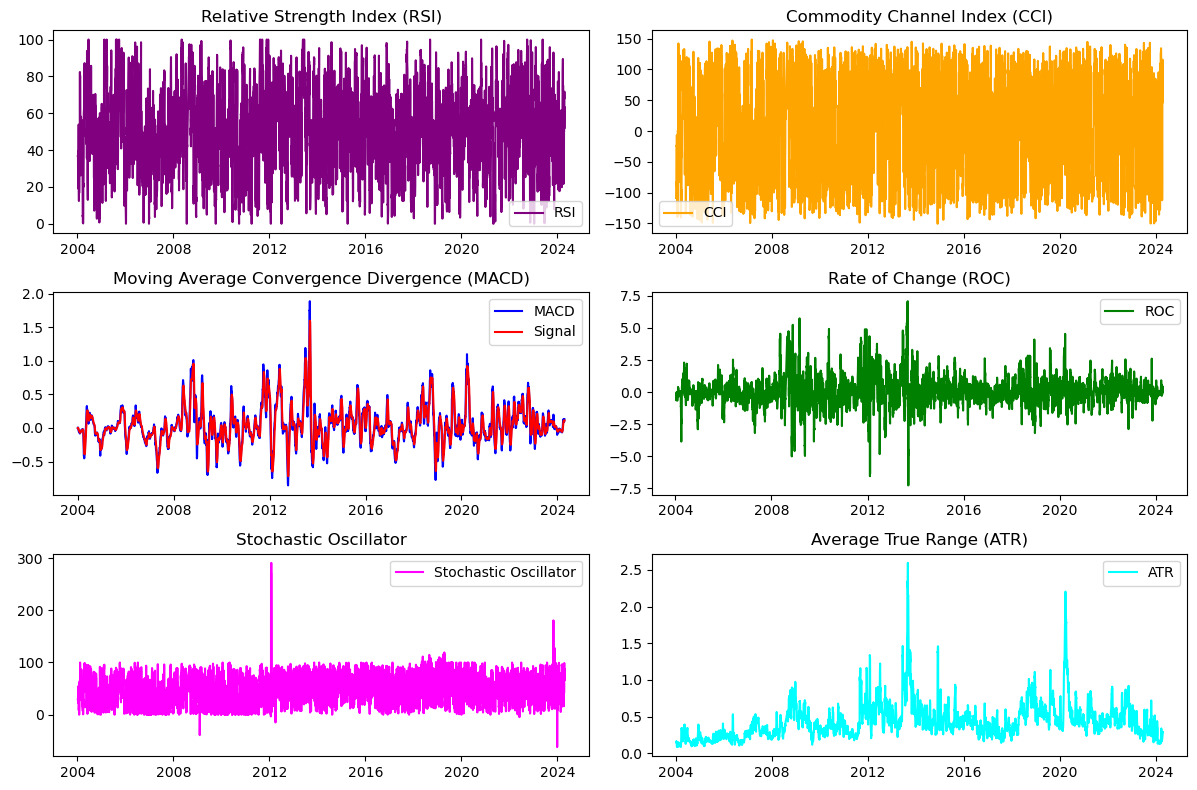

In [20]:
def amm():
    # Load your data into df
    # Assume df is your DataFrame with financial data
    
    # Set the DataFrame index to the date column if it's not already set
    # df.set_index('Date', inplace=True)  # Uncomment and replace 'Date' with your actual date column name if needed

    # Calculate RSI and assign it to the new DataFrame
    df['RSI'] = RSI(df['Close'])

    # Calculate CCI and assign it
    df['CCI'] = CCI(df)

    # Calculate MACD and its Signal line and assign them
    macd, signal = MACD(df)
    df['MACD'] = macd
    df['Signal'] = signal

    # Calculate ROC and assign it
    df['ROC'] = ROC(df)

    # Calculate Stochastic Oscillator and assign it
    df['Stochastic'] = Stochastic_Oscillator(df)

    # Calculate ATR and assign it
    df['ATR'] = ATR(df)
    
    df['7_day_avg'] = day_avg(df)
    
    df['lag_1'] = lag(df)
    
    df['diff'] = diff(df)

    # Plot all indicators in one figure
    fig, axs = plt.subplots(3, 2, figsize=(12, 8))

    axs[0, 0].plot(df.index, df['RSI'], label='RSI', color='purple')
    axs[0, 0].set_title('Relative Strength Index (RSI)')
    axs[0, 0].legend()
    axs[0, 0].xaxis_date()

    axs[0, 1].plot(df.index, df['CCI'], label='CCI', color='orange')
    axs[0, 1].set_title('Commodity Channel Index (CCI)')
    axs[0, 1].legend()
    axs[0, 1].xaxis_date()

    axs[1, 0].plot(df.index, df['MACD'], label='MACD', color='blue')
    axs[1, 0].plot(df.index, df['Signal'], label='Signal', color='red')
    axs[1, 0].set_title('Moving Average Convergence Divergence (MACD)')
    axs[1, 0].legend()
    axs[1, 0].xaxis_date()

    axs[1, 1].plot(df.index, df['ROC'], label='ROC', color='green')
    axs[1, 1].set_title('Rate of Change (ROC)')
    axs[1, 1].legend()
    axs[1, 1].xaxis_date()

    axs[2, 0].plot(df.index, df['Stochastic'], label='Stochastic Oscillator', color='magenta')
    axs[2, 0].set_title('Stochastic Oscillator')
    axs[2, 0].legend()
    axs[2, 0].xaxis_date()

    axs[2, 1].plot(df.index, df['ATR'], label='ATR', color='cyan')
    axs[2, 1].set_title('Average True Range (ATR)')
    axs[2, 1].legend()
    axs[2, 1].xaxis_date()

    plt.tight_layout()
    plt.show()

# Call the function to execute the plotting
amm()

In [21]:
df.head()

,Open,High,Low,Close,Adj Close,RSI,CCI,MACD,Signal,ROC,Stochastic,ATR,7_day_avg,lag_1,diff
Date,,,,,,,,,,,,,,,
2004-01-01,45.528999,45.532001,45.519001,45.527000,45.527000,NaN,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,0.001999
2004-01-02,45.527000,45.645000,45.497002,45.603001,45.603001,NaN,NaN,0.006063,0.001213,NaN,NaN,NaN,NaN,45.527000,-0.076000
2004-01-05,45.528000,45.564999,45.459000,45.466000,45.466000,NaN,NaN,-0.000185,0.000933,NaN,NaN,NaN,NaN,45.603001,0.062000
2004-01-06,45.467999,45.604000,45.457001,45.549000,45.549000,NaN,NaN,0.001543,0.001055,NaN,NaN,NaN,NaN,45.466000,-0.081001
2004-01-07,45.548000,45.560001,45.375000,45.387001,45.387001,NaN,NaN,-0.010044,-0.001165,NaN,NaN,NaN,NaN,45.549000,0.160999


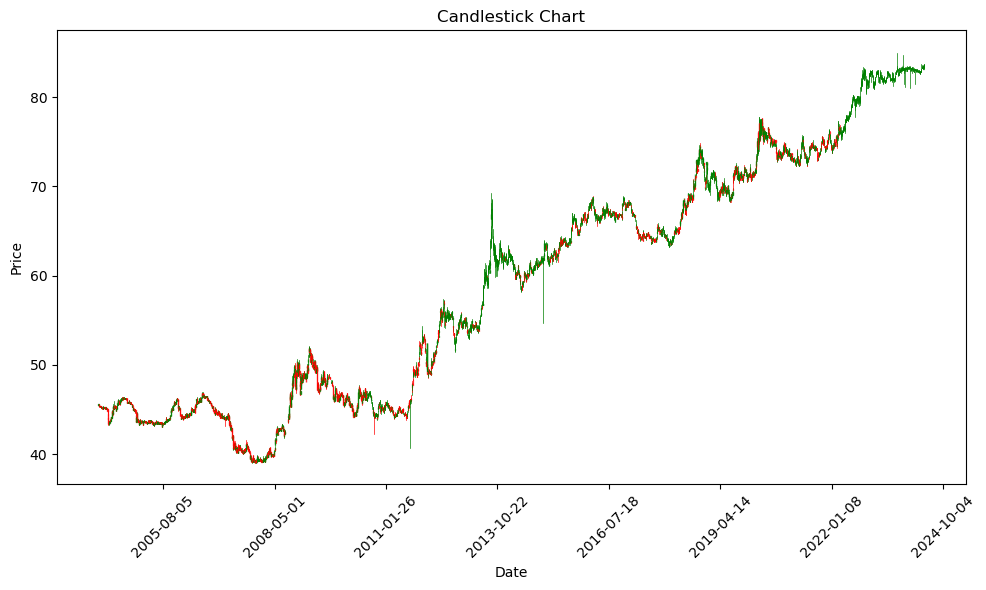

In [22]:
# Assuming df contains your DataFrame with OHLC data and 'Date' as the index
df.reset_index(inplace=True)

# Convert the 'Date' column to matplotlib date format
df['Date'] = df['Date'].apply(mdates.date2num)

plt.figure(figsize=(10, 6))
ax = plt.subplot()

# Prepare data for candlestick plot
ohlc_data = df[['Date', 'Open', 'High', 'Low', 'Close']].values

# Plot candlestick chart
candlestick_ohlc(ax, ohlc_data, width=0.6, colorup='g', colordown='r', alpha=0.8)

# Formatting x-axis as dates
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.xticks(rotation=45)

plt.title('Candlestick Chart')
plt.xlabel('Date')
plt.ylabel('Price')
plt.tight_layout()
plt.show()

# Cleaning the data

In [23]:
df['Date'] = mdates.num2date(df['Date'])

df.head()

,Date,Open,High,Low,Close,Adj Close,RSI,CCI,MACD,Signal,ROC,Stochastic,ATR,7_day_avg,lag_1,diff
0,2004-01-01 00:00:00+00:00,45.528999,45.532001,45.519001,45.527000,45.527000,NaN,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,0.001999
1,2004-01-02 00:00:00+00:00,45.527000,45.645000,45.497002,45.603001,45.603001,NaN,NaN,0.006063,0.001213,NaN,NaN,NaN,NaN,45.527000,-0.076000
2,2004-01-05 00:00:00+00:00,45.528000,45.564999,45.459000,45.466000,45.466000,NaN,NaN,-0.000185,0.000933,NaN,NaN,NaN,NaN,45.603001,0.062000
3,2004-01-06 00:00:00+00:00,45.467999,45.604000,45.457001,45.549000,45.549000,NaN,NaN,0.001543,0.001055,NaN,NaN,NaN,NaN,45.466000,-0.081001
4,2004-01-07 00:00:00+00:00,45.548000,45.560001,45.375000,45.387001,45.387001,NaN,NaN,-0.010044,-0.001165,NaN,NaN,NaN,NaN,45.549000,0.160999


In [24]:
df['Date'] = df['Date'].apply(mdates.date2num)

In [25]:
df = df.dropna()

In [26]:
cm=df.corr()
cm

,Date,Open,High,Low,Close,Adj Close,RSI,CCI,MACD,Signal,ROC,Stochastic,ATR,7_day_avg,lag_1,diff
Date,1.000000,0.962312,0.962431,0.962394,0.962235,0.962235,0.033669,0.041106,0.084357,0.089344,0.025135,0.139918,0.303048,0.962269,0.962181,-0.056967
Open,0.962312,1.000000,0.999871,0.999838,0.999928,0.999928,0.047510,0.046920,0.125342,0.133063,0.037416,0.166714,0.306835,0.999707,0.999823,-0.059892
High,0.962431,0.999871,1.000000,0.999775,0.999867,0.999867,0.049464,0.051071,0.129034,0.136676,0.040102,0.166723,0.313286,0.999582,0.999709,-0.065561
Low,0.962394,0.999838,0.999775,1.000000,0.999831,0.999831,0.047736,0.049951,0.123235,0.130813,0.037304,0.165235,0.300003,0.999612,0.999704,-0.065244
Close,0.962235,0.999928,0.999867,0.999831,1.000000,1.000000,0.049638,0.049492,0.125968,0.133457,0.040131,0.171247,0.307218,0.999680,0.999776,-0.071857
Adj Close,0.962235,0.999928,0.999867,0.999831,1.000000,1.000000,0.049638,0.049492,0.125968,0.133457,0.040131,0.171247,0.307218,0.999680,0.999776,-0.071857
RSI,0.033669,0.047510,0.049464,0.047736,0.049638,0.049638,1.000000,0.707711,0.392101,0.200468,0.853011,0.696260,0.096618,0.031634,0.042801,-0.180299
CCI,0.041106,0.046920,0.051071,0.049951,0.049492,0.049492,0.707711,1.000000,0.216515,0.084402,0.604842,0.762408,0.065735,0.030490,0.038779,-0.217226
MACD,0.084357,0.125342,0.129034,0.123235,0.125968,0.125968,0.392101,0.216515,1.000000,0.955540,0.477548,0.222812,0.407501,0.118079,0.124495,-0.060307
Signal,0.089344,0.133063,0.136676,0.130813,0.133457,0.133457,0.200468,0.084402,0.955540,1.000000,0.261988,0.093963,0.427842,0.130189,0.133136,-0.041592


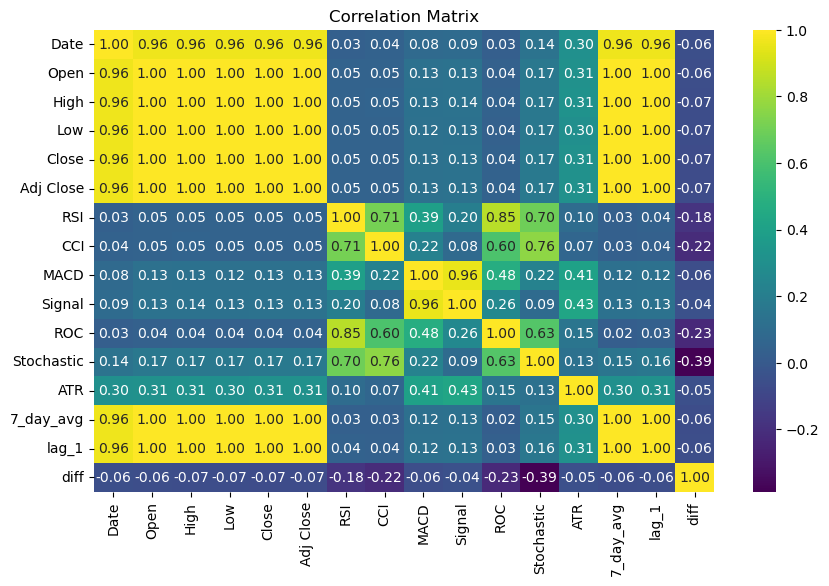

In [27]:
plt.figure(figsize=(10, 6))
sns.heatmap(cm, annot=True, cmap='viridis', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [28]:
print(df.columns)

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'RSI', 'CCI',
       'MACD', 'Signal', 'ROC', 'Stochastic', 'ATR', '7_day_avg', 'lag_1',
       'diff'],
      dtype='object')


In [29]:
df.shape

(5257, 16)

In [30]:
features = ['Open', 'High', 'Low', 'Adj Close', 'RSI', 'CCI', 'MACD',
            'Signal', 'ROC', 'Stochastic', 'ATR', '7_day_avg', 'lag_1', 'diff']
target = 'Close'

In [31]:
df.head()

,Date,Open,High,Low,Close,Adj Close,RSI,CCI,MACD,Signal,ROC,Stochastic,ATR,7_day_avg,lag_1,diff
7,12429.0,45.328999,45.396999,45.299999,45.344002,45.344002,36.199079,-83.380571,-0.032721,-0.012538,-0.401956,27.470356,0.161572,45.452572,45.351002,-0.015003
8,12430.0,45.348999,45.365002,45.231998,45.313000,45.313000,26.536999,-89.585950,-0.041891,-0.018409,-0.635925,22.192530,0.159429,45.411143,45.344002,0.035999
9,12431.0,45.312000,45.405998,45.244999,45.327999,45.327999,36.088508,-53.701060,-0.047402,-0.024207,-0.303525,26.203056,0.161858,45.391429,45.313000,-0.015999
10,12432.0,45.334000,45.389000,45.299999,45.348999,45.348999,26.958134,-24.356212,-0.049505,-0.029267,-0.439089,36.060249,0.153572,45.362857,45.327999,-0.014999
11,12433.0,45.341000,45.382000,45.299999,45.325001,45.325001,39.526761,-23.534790,-0.052502,-0.033914,-0.136604,35.849600,0.138858,45.354000,45.348999,0.015999


In [32]:
df['Date'] = mdates.num2date(df['Date'])

In [33]:
df.head()

,Date,Open,High,Low,Close,Adj Close,RSI,CCI,MACD,Signal,ROC,Stochastic,ATR,7_day_avg,lag_1,diff
7,2004-01-12 00:00:00+00:00,45.328999,45.396999,45.299999,45.344002,45.344002,36.199079,-83.380571,-0.032721,-0.012538,-0.401956,27.470356,0.161572,45.452572,45.351002,-0.015003
8,2004-01-13 00:00:00+00:00,45.348999,45.365002,45.231998,45.313000,45.313000,26.536999,-89.585950,-0.041891,-0.018409,-0.635925,22.192530,0.159429,45.411143,45.344002,0.035999
9,2004-01-14 00:00:00+00:00,45.312000,45.405998,45.244999,45.327999,45.327999,36.088508,-53.701060,-0.047402,-0.024207,-0.303525,26.203056,0.161858,45.391429,45.313000,-0.015999
10,2004-01-15 00:00:00+00:00,45.334000,45.389000,45.299999,45.348999,45.348999,26.958134,-24.356212,-0.049505,-0.029267,-0.439089,36.060249,0.153572,45.362857,45.327999,-0.014999
11,2004-01-16 00:00:00+00:00,45.341000,45.382000,45.299999,45.325001,45.325001,39.526761,-23.534790,-0.052502,-0.033914,-0.136604,35.849600,0.138858,45.354000,45.348999,0.015999


In [75]:
df.to_csv('historic_currency.csv', index=False)

# Spliting into train, test and validation

In [34]:
# Calculate lengths for each set
total_length = len(df)
train_length = int(0.7 * total_length)
validation_length = int(0.2 * total_length)
test_length = total_length - train_length - validation_length

# Split the DataFrame into train, validation, and test sets
train_df = df.iloc[:train_length]
validation_df = df.iloc[train_length:train_length + validation_length]
test_df = df.iloc[train_length + validation_length:]

# Print the lengths of train, validation, and test sets
print("Train set length:", len(train_df))
print("Validation set length:", len(validation_df))
print("Test set length:", len(test_df))

Train set length: 3679
Validation set length: 1051
Test set length: 527


In [35]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3679 entries, 7 to 3685
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype              
---  ------      --------------  -----              
 0   Date        3679 non-null   datetime64[ns, UTC]
 1   Open        3679 non-null   float64            
 2   High        3679 non-null   float64            
 3   Low         3679 non-null   float64            
 4   Close       3679 non-null   float64            
 5   Adj Close   3679 non-null   float64            
 6   RSI         3679 non-null   float64            
 7   CCI         3679 non-null   float64            
 8   MACD        3679 non-null   float64            
 9   Signal      3679 non-null   float64            
 10  ROC         3679 non-null   float64            
 11  Stochastic  3679 non-null   float64            
 12  ATR         3679 non-null   float64            
 13  7_day_avg   3679 non-null   float64            
 14  lag_1       3679 non-null   float64     

In [36]:
X_train = train_df[features]
y_train = train_df['Close']
X_val = validation_df[features]
y_val = validation_df[target]
X_test = test_df[features]
y_test = test_df[target]

In [37]:
print(X_train.shape)
print(y_train.shape)
print(X_val.shape)
print(y_val.shape)
print(X_test.shape)
print(y_test.shape)

(3679, 14)
(3679,)
(1051, 14)
(1051,)
(527, 14)
(527,)


In [38]:
X_train.head()

,Open,High,Low,Adj Close,RSI,CCI,MACD,Signal,ROC,Stochastic,ATR,7_day_avg,lag_1,diff
7,45.328999,45.396999,45.299999,45.344002,36.199079,-83.380571,-0.032721,-0.012538,-0.401956,27.470356,0.161572,45.452572,45.351002,-0.015003
8,45.348999,45.365002,45.231998,45.313000,26.536999,-89.585950,-0.041891,-0.018409,-0.635925,22.192530,0.159429,45.411143,45.344002,0.035999
9,45.312000,45.405998,45.244999,45.327999,36.088508,-53.701060,-0.047402,-0.024207,-0.303525,26.203056,0.161858,45.391429,45.313000,-0.015999
10,45.334000,45.389000,45.299999,45.348999,26.958134,-24.356212,-0.049505,-0.029267,-0.439089,36.060249,0.153572,45.362857,45.327999,-0.014999
11,45.341000,45.382000,45.299999,45.325001,39.526761,-23.534790,-0.052502,-0.033914,-0.136604,35.849600,0.138858,45.354000,45.348999,0.015999


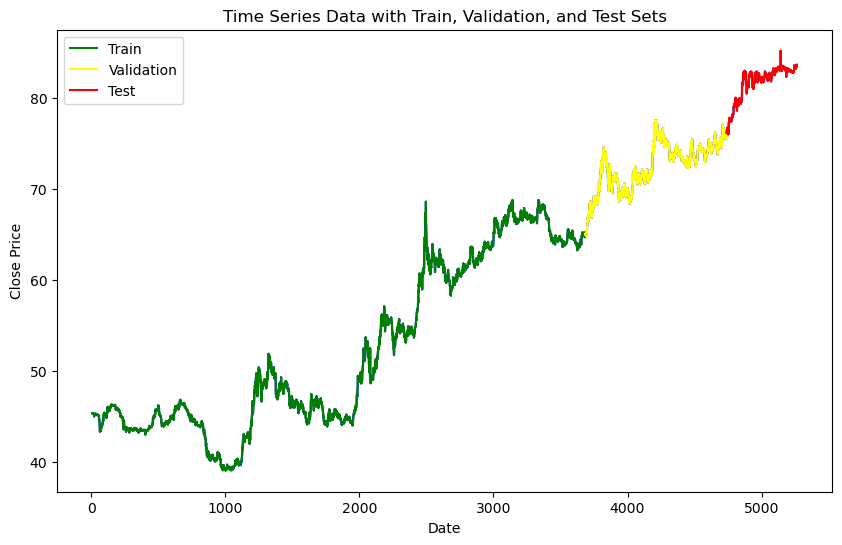

In [39]:
import matplotlib.pyplot as plt

# Plotting the entire DataFrame
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['Close'], color='blue')

# Plotting train, validation, and test sets with different colors
plt.plot(train_df.index, train_df['Close'], label='Train', color='green')
plt.plot(validation_df.index, validation_df['Close'], label='Validation', color='yellow')
plt.plot(test_df.index, test_df['Close'], label='Test', color='red')

# Adding labels and legend
plt.title('Time Series Data with Train, Validation, and Test Sets')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

# Baseline model selection

1.  XGBRegressor

In [40]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error

In [41]:
xgb_model = XGBRegressor(
    max_depth=3,           # Maximum depth of a tree
    min_child_weight=1,    # Minimum sum of instance weight needed in a child
    gamma=0,               # Minimum loss reduction required to make a further partition on a leaf node
    subsample=0.8,         # Subsample ratio of the training instances
    colsample_bytree=0.8,  # Subsample ratio of columns when constructing each tree
    learning_rate=0.1,     # Step size shrinkage used in update to prevents overfitting
    n_estimators=30,       # Number of boosting rounds
    random_state=42        # Random seed for reproducibility
)

xgb_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=0, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=1, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=30, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [42]:
xgb_train_forecast = xgb_model.predict(X_train)
xgb_val_forecast = xgb_model.predict(X_val)

In [43]:
xgb_train_mse = mean_squared_error(y_train, xgb_train_forecast)
xgb_val_mse = mean_squared_error(y_val, xgb_val_forecast)

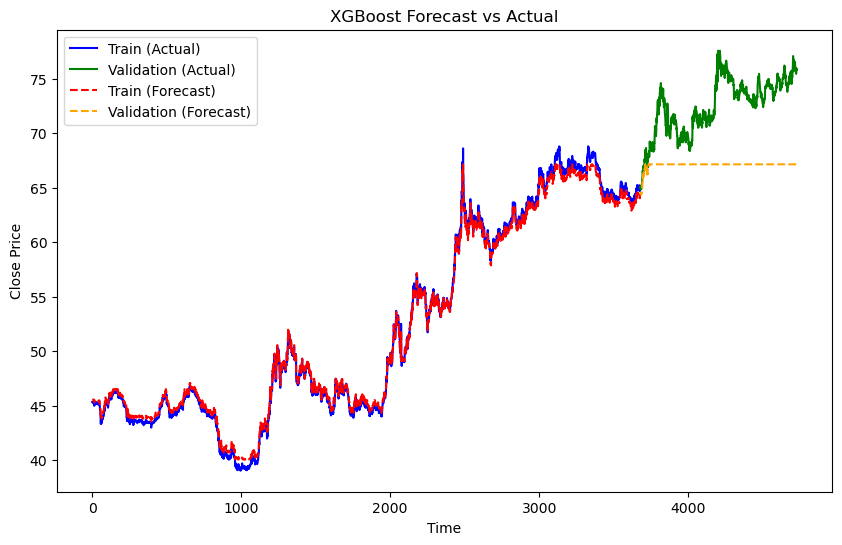

In [44]:
# Plotting forecasted and actual values for XGBoost
plt.figure(figsize=(10, 6))
plt.plot(range(len(y_train)), y_train, label='Train (Actual)', color='blue')
plt.plot(range(len(y_train), len(y_train) + len(y_val)), y_val, label='Validation (Actual)', color='green')
plt.plot(range(len(y_train)), xgb_train_forecast, label='Train (Forecast)', color='red', linestyle='--')
plt.plot(range(len(y_train), len(y_train) + len(y_val)), xgb_val_forecast, label='Validation (Forecast)', color='orange', linestyle='--')
plt.title('XGBoost Forecast vs Actual')
plt.xlabel('Time')
plt.ylabel('Close Price')
plt.legend()
plt.show()

In [45]:
print("\nXGBoost MSE (Train):", xgb_train_mse)
print("XGBoost MSE (Validation):", xgb_val_mse)


XGBoost MSE (Train): 0.18165631443078412
XGBoost MSE (Validation): 34.90105819695935


2.  Long Short Term Memory

In [46]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.preprocessing import MinMaxScaler
from keras.optimizers import Adam
from statsmodels.tsa.arima.model import ARIMA

In [47]:
scaler = MinMaxScaler(feature_range=(0, 1))
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

In [48]:
y_train_scaled = scaler.fit_transform(y_train.values.reshape(-1, 1))
y_val_scaled = scaler.transform(y_val.values.reshape(-1, 1))

In [49]:
X_train_scaled = np.reshape(X_train_scaled, (X_train_scaled.shape[0], X_train_scaled.shape[1], 1))
X_val_scaled = np.reshape(X_val_scaled, (X_val_scaled.shape[0], X_val_scaled.shape[1], 1))

In [50]:
lstm_model = Sequential()
lstm_model.add(LSTM(units=32, activation='relu', return_sequences=True, input_shape=(X_train_scaled.shape[1], 1)))
lstm_model.add(Dropout(0.3))
lstm_model.add(LSTM(units=32, activation='relu', return_sequences=True))
lstm_model.add(Dropout(0.3))
lstm_model.add(LSTM(units=32, activation='relu'))
lstm_model.add(Dropout(0.3))
lstm_model.add(Dense(units=1))

In [51]:
lstm_model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

In [52]:
lstm_model.fit(X_train_scaled, y_train_scaled, epochs=15, batch_size=32)

Epoch 1/15

115/115 [==============================] - 17s 38ms/step - loss: 0.0638
Epoch 2/15
115/115 [==============================] - 4s 38ms/step - loss: 0.0171
Epoch 3/15
115/115 [==============================] - 4s 38ms/step - loss: 0.0120
Epoch 4/15
115/115 [==============================] - 3s 29ms/step - loss: 0.0096
Epoch 5/15
115/115 [==============================] - 4s 35ms/step - loss: 0.0083
Epoch 6/15
115/115 [==============================] - 4s 38ms/step - loss: 0.0073
Epoch 7/15
115/115 [==============================] - 4s 36ms/step - loss: 0.0066
Epoch 8/15
115/115 [==============================] - 4s 34ms/step - loss: 0.0064
Epoch 9/15
115/115 [==============================] - 4s 34ms/step - loss: 0.0059
Epoch 10/15
115/115 [==============================] - 4s 39ms/step - loss: 0.0051
Epoch 11/15
115/115 [==============================] - 4s 39ms/step - loss: 0.0048
Epoch 12/15
115/115 [==============================] - 4s 36ms/step - loss: 0.0047
Epoch 13/15

In [53]:
train_predictions = lstm_model.predict(X_train_scaled)
val_predictions = lstm_model.predict(X_val_scaled)

33/33 [==============================] - 1s 15ms/step


In [54]:
train_predictions = scaler.inverse_transform(train_predictions)
val_predictions = scaler.inverse_transform(val_predictions)

In [55]:
train_mse = mean_squared_error(y_train, train_predictions)
val_mse = mean_squared_error(y_val, val_predictions)

In [56]:
print(f"Train MSE: {train_mse}")
print(f"Validation MSE: {val_mse}")

Train MSE: 0.9548465128056001
Validation MSE: 9.731291541470158


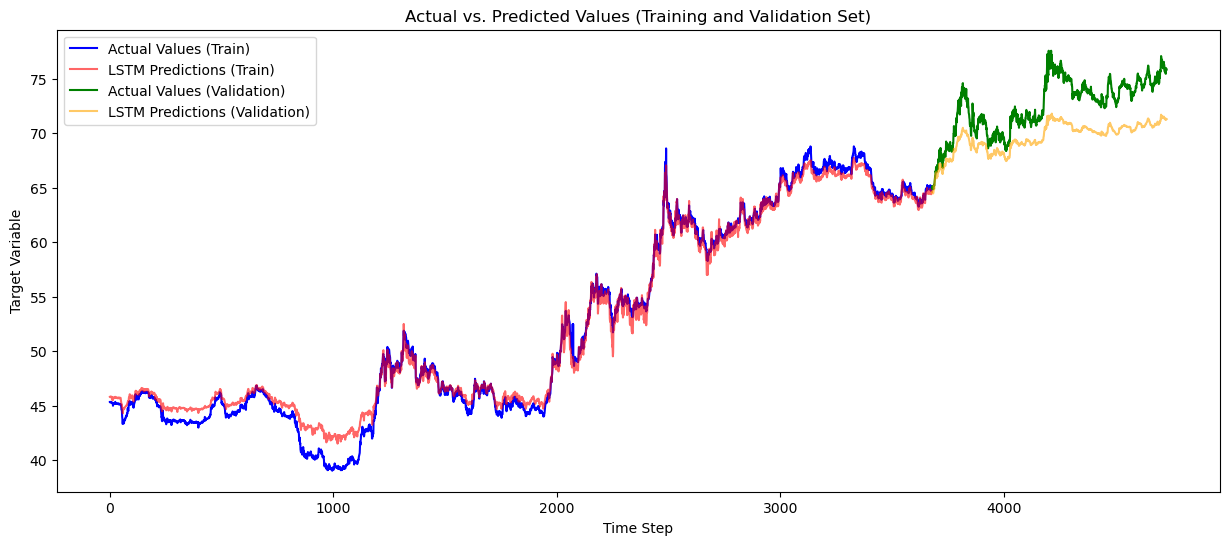

In [57]:
# Cell 8: Plot actual vs. predicted values for training and validation set in one graph
plt.figure(figsize=(15, 6))

# Since we may have different lengths for training and validation sets, we'll create a continuous index
total_length = len(y_train) + len(y_val)
train_index = range(0, len(y_train))
val_index = range(len(y_train), total_length)

# Plot actual training values
plt.plot(train_index, y_train.values, label='Actual Values (Train)', color='blue')

# Plot predicted training values
plt.plot(train_index, train_predictions, label='LSTM Predictions (Train)', color='red', alpha=0.6)

# Plot actual validation values
plt.plot(val_index, y_val.values, label='Actual Values (Validation)', color='green')

# Plot predicted validation values
plt.plot(val_index, val_predictions, label='LSTM Predictions (Validation)', color='orange', alpha=0.6)

plt.title('Actual vs. Predicted Values (Training and Validation Set)')
plt.xlabel('Time Step')
plt.ylabel('Target Variable')
plt.legend()
plt.show()

# Time Series Analysis

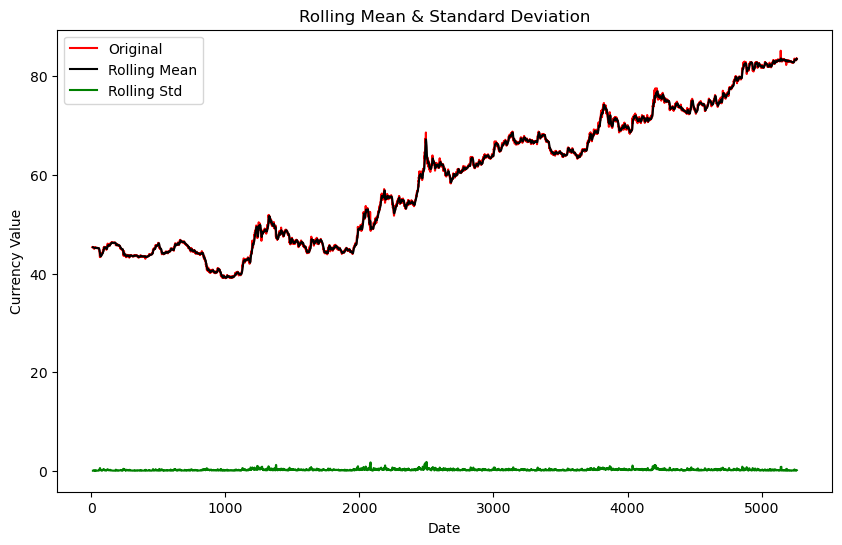

Test statistic: 0.09097157631106156
p-value: 0.9654392483496502
Critical Values: {'1%': -3.431597617063335, '5%': -2.862091317478062, '10%': -2.5670634659915716}


In [58]:
from statsmodels.tsa.stattools import adfuller

def check_stationarity(ts):
    # Calculate rolling statistics
    rolmean = ts.rolling(window=6).mean()
    rolstd = ts.rolling(window=6).std()
    
    # Plot rolling statistics
    plt.figure(figsize=(10, 6))   
    plt.plot(ts, color='red', label='Original')
    plt.plot(rolmean, color='black', label='Rolling Mean')
    plt.plot(rolstd, color='green', label='Rolling Std')
    plt.xlabel('Date')
    plt.ylabel('Currency Value')
    plt.title('Rolling Mean & Standard Deviation')
    plt.legend()
    plt.show()
    
    # Dickey-Fuller test
    result = adfuller(ts, autolag='AIC')
    print('Test statistic:', result[0])
    print('p-value:', result[1])
    print('Critical Values:', result[4])

# Call the function to check stationarity
check_stationarity(df['Close'])

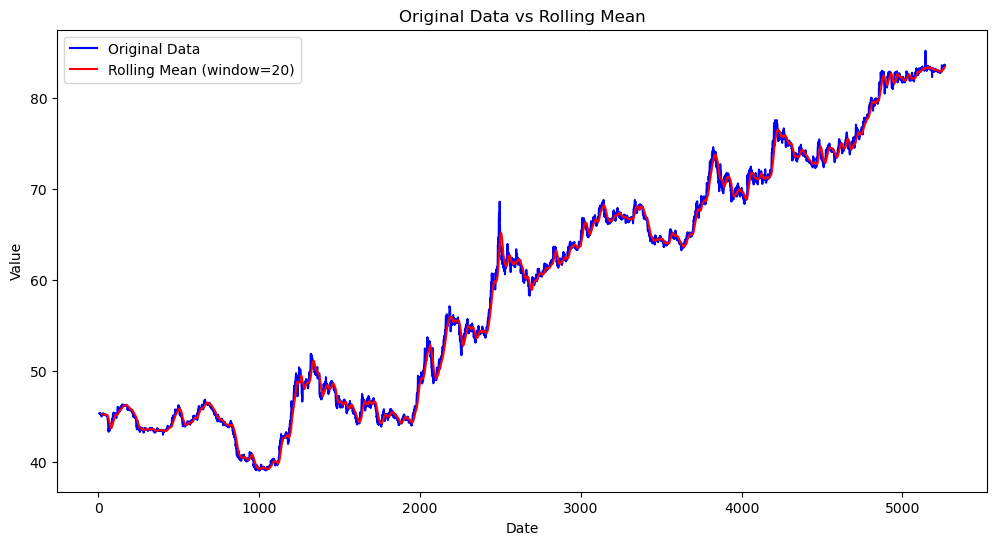

In [59]:
rolling_mean = df['Close'].rolling(window=20).mean()

# Plot the original time series data and the rolling mean
plt.figure(figsize=(12, 6))
plt.plot(df['Close'], color='blue', label='Original Data')
plt.plot(rolling_mean, color='red', label='Rolling Mean (window=20)')
plt.title('Original Data vs Rolling Mean')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()

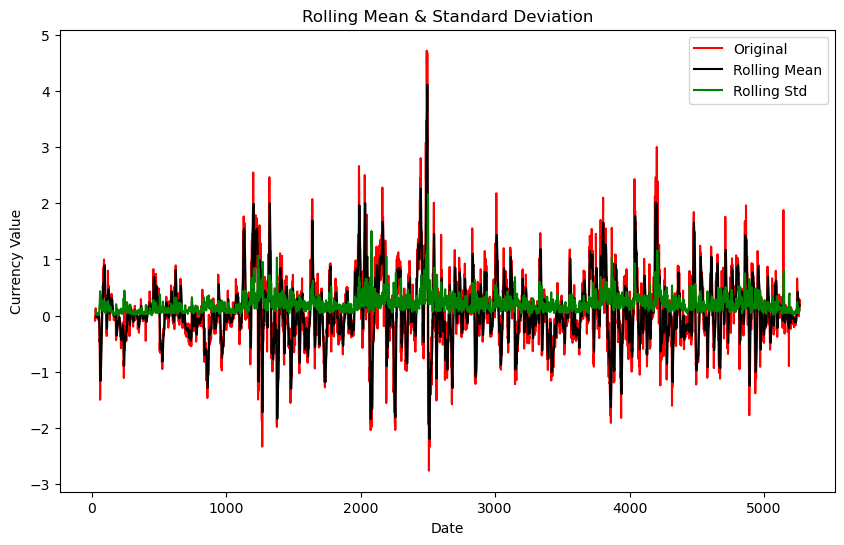

Test statistic: -12.700993456543715
p-value: 1.0800233535243118e-23
Critical Values: {'1%': -3.4316040771471115, '5%': -2.8620941715638626, '10%': -2.567064985323375}


In [60]:
df_moving_avg_diff = df['Close'] - rolling_mean
df_moving_avg_diff.dropna(inplace=True)

check_stationarity(df_moving_avg_diff)

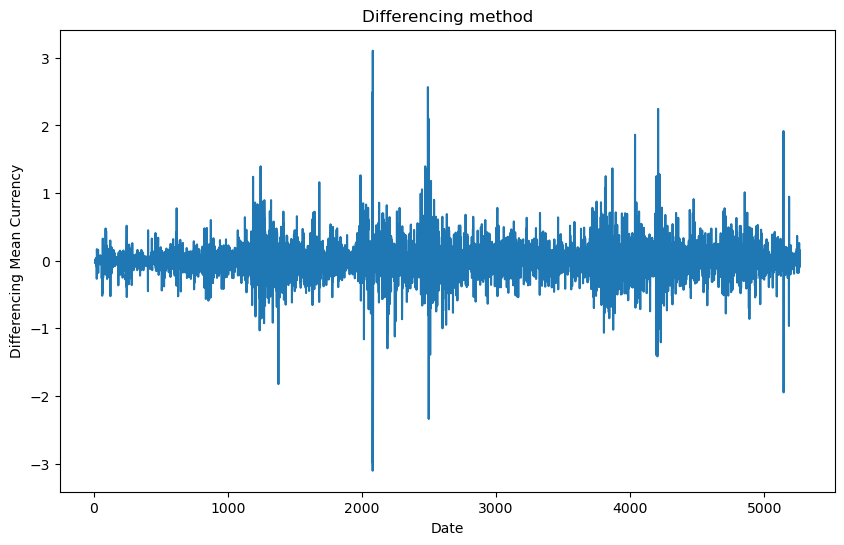

In [61]:
diff = df['Close'] - df['Close'].shift()
plt.figure(figsize=(10,6))
plt.plot(diff)
plt.title("Differencing method")
plt.xlabel("Date")
plt.ylabel("Differencing Mean Currency")
plt.show()

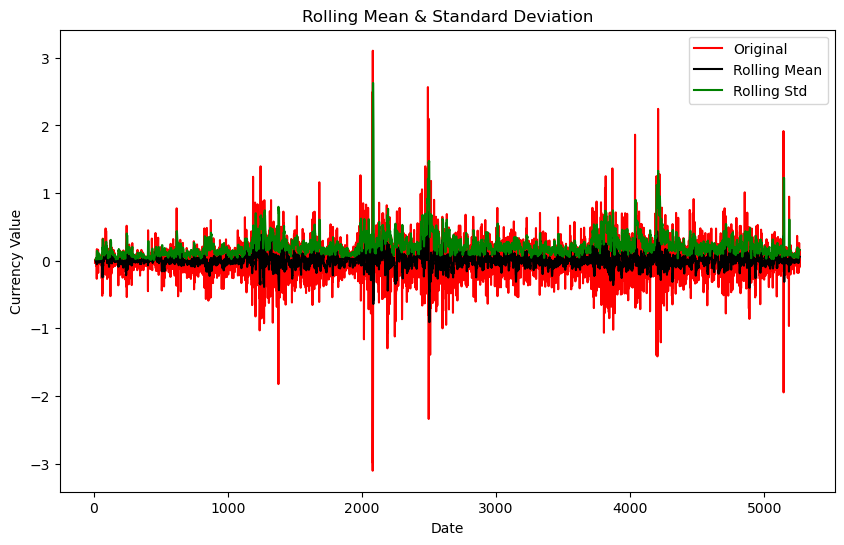

Test statistic: -20.28313998462889
p-value: 0.0
Critical Values: {'1%': -3.431597617063335, '5%': -2.862091317478062, '10%': -2.5670634659915716}


In [62]:
diff.dropna(inplace=True)
check_stationarity(diff)

In [63]:
from statsmodels.tsa.stattools import acf, pacf

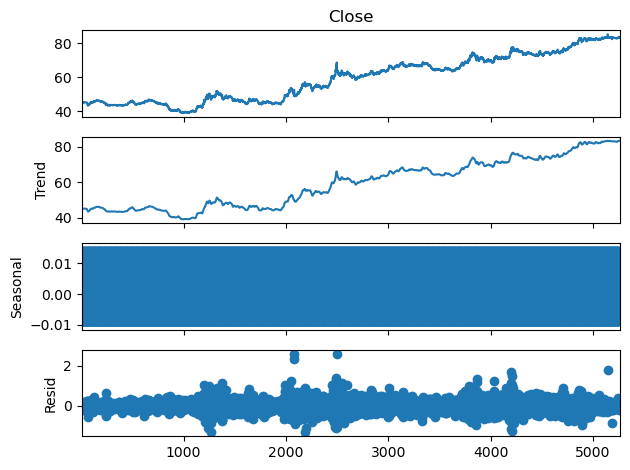

In [64]:
from statsmodels.tsa.seasonal import seasonal_decompose 

# Perform seasonal decomposition
result = seasonal_decompose(df['Close'], model='additive', period=12)

# Plot ETS decomposition
result.plot()
plt.show()

In [65]:
import time
import pandas as pd

start = time.time()

# function to create all combinations of differencing orders as needed
def differencing(timeseries, m):
    info = []
    
    # "general" differencing only (d = 0 or 1 or 2)
    for i in range(3):
        timeseries.name = f"d{i}_D0_m0"
        info.append(timeseries)
        timeseries = timeseries.diff()
    
    # seasonal differencing (D = 1) given d = 0 or 1 or 2
    for i in m:
        for j in range(3):
            timeseries = info[j].diff(periods=i)
            timeseries.name = f"d{j}_D1_m{i}"
            info.append(timeseries)
    
    # seasonal differencing (D = 2) given d = 0 or 1 or 2
    for i in m:
        for j in range(3):
            timeseries = info[j+3].diff(periods=i)
            timeseries.name = f"d{j}_D2_m{i}"
            info.append(timeseries)
        
    return pd.DataFrame(info).T

# Assuming df_trimmed['VALUE'] is your currency data
# Call the differencing function to create the differenced series
diff_series = differencing(df['Close'], [12])

# Print the head of the differenced series to check the result
print(diff_series.head())

end = time.time()
print("Time taken:", end - start)

     d0_D0_m0  d1_D0_m0  d2_D0_m0  d0_D1_m12  d1_D1_m12  d2_D1_m12  d0_D2_m12  \
7   45.344002       NaN       NaN        NaN        NaN        NaN        NaN   
8   45.313000 -0.031002       NaN        NaN        NaN        NaN        NaN   
9   45.327999  0.014999  0.046001        NaN        NaN        NaN        NaN   
10  45.348999  0.021000  0.006001        NaN        NaN        NaN        NaN   
11  45.325001 -0.023998 -0.044998        NaN        NaN        NaN        NaN   

    d1_D2_m12  d2_D2_m12  
7         NaN        NaN  
8         NaN        NaN  
9         NaN        NaN  
10        NaN        NaN  
11        NaN        NaN  
Time taken: 0.14926791191101074


In [66]:
# function to create a summary of test results of all the series
def adf_summary(diff_series):
    from statsmodels.tsa.stattools import adfuller
    summary = []
    
    for i in diff_series:
        # unpack the results
        a, b, c, d, e, f = adfuller(diff_series[i].dropna())
        g, h, i = e.values()
        results = [a, b, c, d, g, h, i]
        summary.append(results)
    
    columns = ["Test Statistic", "p-value", "#Lags Used", "No. of Obs. Used",
               "Critical Value (1%)", "Critical Value (5%)", "Critical Value (10%)"]
    index = diff_series.columns
    summary = pd.DataFrame(summary, index=index, columns=columns)
    
    return summary


# create the summary
summary = adf_summary(diff_series)

# filter away results that are not stationary
summary_passed = summary[summary["p-value"] < 0.05]
summary_passed

# output indices as a list
index_list = pd.Index.tolist(summary_passed.index)

# use the list as a condition to select stationary time-series
passed_series = diff_series[index_list]

# sort the columns by names
ps = passed_series.sort_index(axis=1)

In [67]:
summary_passed

,Test Statistic,p-value,#Lags Used,No. of Obs. Used,Critical Value (1%),Critical Value (5%),Critical Value (10%)
d1_D0_m0,-20.283140,0.000000e+00,11,5244,-3.431598,-2.862091,-2.567063
d2_D0_m0,-22.290616,0.000000e+00,31,5223,-3.431603,-2.862094,-2.567065
d0_D1_m12,-12.265569,8.876642e-23,32,5212,-3.431605,-2.862095,-2.567065
d1_D1_m12,-20.417750,0.000000e+00,27,5216,-3.431604,-2.862094,-2.567065
d2_D1_m12,-25.616525,0.000000e+00,33,5209,-3.431606,-2.862095,-2.567065
d0_D2_m12,-19.372172,0.000000e+00,33,5199,-3.431608,-2.862096,-2.567066
d1_D2_m12,-19.652767,0.000000e+00,32,5199,-3.431608,-2.862096,-2.567066
d2_D2_m12,-28.986881,0.000000e+00,33,5197,-3.431609,-2.862096,-2.567066


<Axes: title={'center': 'Possible AR Terms'}, xlabel='nth lag', ylabel='Sum of PACF'>

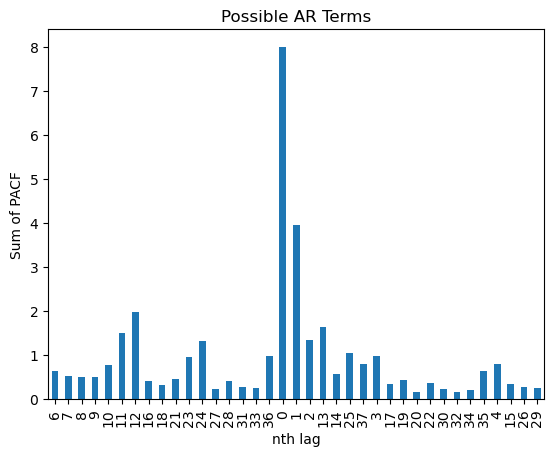

In [68]:
# Calculate ACF & PACF for the resulting series

# store all values of significant spikes by nlags in PACF plots
from statsmodels.tsa.stattools import pacf

# create an empty dataframe to store values
df_sp_p = pd.DataFrame()
AR = []
for i in ps:
    # unpack the results into PACF and their CI
    PACF, PACF_ci = pacf(ps[i].dropna(), alpha=0.05, method='ywm')
    
    # subtract the upper and lower limits of CI by ACF to centre CI at zero
    PACF_ci_ll = PACF_ci[:,0] - PACF
    PACF_ci_ul = PACF_ci[:,1] - PACF
    
    # find positions of significant spikes ~ possible value of p & P
    sp1 = np.where(PACF < PACF_ci_ll)[0]
    sp2 = np.where(PACF > PACF_ci_ul)[0]
    
    # PACF values of the significant spikes
    sp1_value = abs(PACF[PACF < PACF_ci_ll])
    sp2_value = PACF[PACF > PACF_ci_ul]
    
    # store values to dataframe
    sp1_series = pd.Series(sp1_value, index=sp1)
    sp2_series = pd.Series(sp2_value, index=sp2)
    df_sp_p = pd.concat((df_sp_p, sp1_series, sp2_series), axis=1)


# store all values of significant spikes by nlags in ACF plots
from statsmodels.tsa.stattools import acf

# create an empty dataframe to store values
df_sp_q = pd.DataFrame()
MA = []
for i in ps:
    # unpack the results into ACF and their CI
    ACF, ACF_ci = acf(ps[i].dropna(), alpha=0.05)
    
    # subtract the upper and lower limits of CI by ACF to centre CI at zero
    ACF_ci_ll = ACF_ci[:,0] - ACF
    ACF_ci_ul = ACF_ci[:,1] - ACF
    
    # find positions of significant spikes ~ possible value of q & Q
    sp1 = np.where(ACF < ACF_ci_ll)[0]
    sp2 = np.where(ACF > ACF_ci_ul)[0]
    
    # ACF values of the significant spikes
    sp1_value = abs(ACF[ACF < ACF_ci_ll])
    sp2_value = ACF[ACF > ACF_ci_ul]
    
    # store values to dataframe
    sp1_series = pd.Series(sp1_value, index=sp1)
    sp2_series = pd.Series(sp2_value, index=sp2)
    df_sp_q = pd.concat((df_sp_q, sp1_series, sp2_series), axis=1)

# visualize sums of values of significant spikes by nlags in PACF plots
df_sp_p.iloc[1:].T.sum().plot(kind='bar', title='Possible AR Terms', xlabel='nth lag', ylabel='Sum of PACF')

In [69]:
# fit model
model = ARIMA(train_df['Close'], order=(1,1,0))
model_fit = model.fit()

C:\Users\Lenovo\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Lenovo\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Lenovo\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Lenovo\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [70]:
start_index= datetime(2004,1,1)
end_index= datetime(2018,3,19)

In [71]:
train_predictions = model_fit.predict(start=train_df.index[0], end=train_df.index[-1])
val_predictions = model_fit.predict(start=validation_df.index[0], end=validation_df.index[-1])

# Calculate MSE
train_mse = mean_squared_error(train_df['Close'], train_predictions)
val_mse = mean_squared_error(validation_df['Close'], val_predictions)

print(f"Train MSE: {train_mse}")
print(f"Validation MSE: {val_mse}")

Train MSE: 0.34485800278080614
Validation MSE: 61.80933966010444


C:\Users\Lenovo\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\Lenovo\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [72]:
val_predictions

3686    65.045231
3687    65.045231
3688    65.045231
3689    65.045231
3690    65.045231
          ...    
4732    65.045231
4733    65.045231
4734    65.045231
4735    65.045231
4736    65.045231
Name: predicted_mean, Length: 1051, dtype: float64

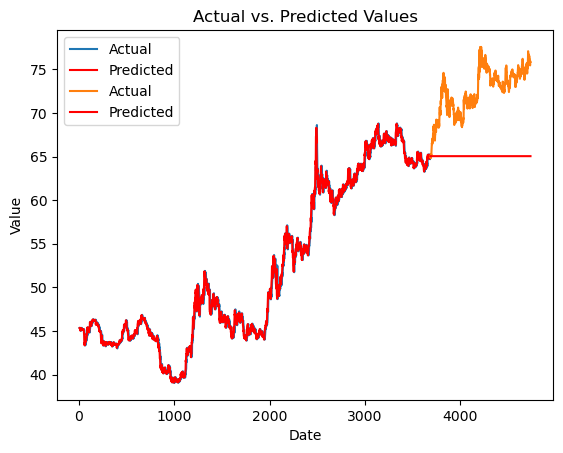

In [73]:
# Plot actual vs. predicted values
plt.plot(train_df.index, train_df['Close'], label='Actual')
plt.plot(train_df.index, train_predictions, label='Predicted', color='red')
plt.plot(validation_df.index, validation_df['Close'], label='Actual')
plt.plot(validation_df.index, val_predictions, label='Predicted', color='red')
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Actual vs. Predicted Values')
plt.legend()

4. SARIMA

<Axes: title={'center': 'Possible MA Terms'}, xlabel='nth lag', ylabel='Sum of ACF'>

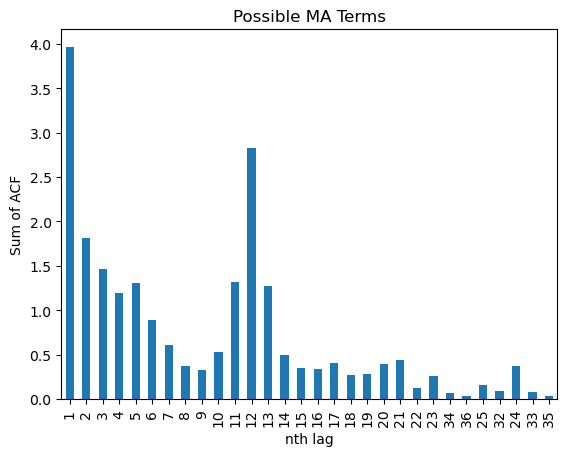

In [74]:
# visualize sums of values of significant spikes by nlags in ACF plots
df_sp_q.iloc[1:].T.sum().plot(kind='bar', title='Possible MA Terms', xlabel='nth lag', ylabel='Sum of ACF')

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

model = SARIMAX(train_data_boxcox_difference, order=(1,1,1), seasonal_order=(1,1,1,6))
model_fit = model.fit()
print(model_fit.params)